In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [2]:
vg_data =pd.read_csv(r"C:\Users\hp\Downloads\vgset.csv") 

In [3]:
vg_data.head()

,OpenBPApproved,Complexity,Prototype,NumberofTeams,TotalEstimate,MultiSite,ProjectFramework,Segment,ProgramName,Portfolio,Region,Risks,Leaves,ExpLead,SuccesFactor
0,1.5,1,1,3,12,1,1,1,2,1,1,2,5,12,1
1,0.5,0,1,1,6,0,2,2,1,2,3,0,12,15,1
2,2.0,2,0,4,24,1,1,2,3,1,2,5,12,6,0
3,1.0,1,0,2,10,1,2,3,1,3,1,0,0,25,1
4,3.0,2,1,5,36,1,1,1,2,3,1,10,10,8,0


In [5]:
vg_data.describe()

,OpenBPApproved,Complexity,Prototype,NumberofTeams,TotalEstimate,MultiSite,ProjectFramework,Segment,ProgramName,Portfolio,Region,Risks,Leaves,ExpLead,SuccesFactor
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,1.700000,1.100000,0.600000,2.90000,15.400000,0.600000,1.600000,1.900000,1.700000,2.000000,1.700000,2.200000,9.700000,14.30000,0.800000
std,0.948683,0.737865,0.516398,1.37032,9.617114,0.516398,0.516398,0.875595,0.674949,0.942809,0.823273,3.425395,5.793675,5.47824,0.421637
min,0.500000,0.000000,0.000000,1.00000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.00000,0.000000
25%,1.000000,1.000000,0.000000,2.00000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.250000,12.00000,1.000000
50%,1.750000,1.000000,1.000000,2.50000,12.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.500000,0.000000,11.000000,14.50000,1.000000
75%,2.375000,1.750000,1.000000,3.75000,21.500000,1.000000,2.000000,2.750000,2.000000,3.000000,2.000000,4.250000,12.000000,15.75000,1.000000
max,3.000000,2.000000,1.000000,5.00000,36.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,10.000000,20.000000,25.00000,1.000000


In [7]:
X = vg_data[['OpenBPApproved', 'Complexity', 'Prototype', 'NumberofTeams',
       'TotalEstimate', 'MultiSite', 'ProjectFramework ', 'Segment',
       'ProgramName', 'Portfolio', 'Region', 'Risks', 'Leaves', 'ExpLead']]
y=vg_data[['SuccesFactor']]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state =100)

In [16]:
clf_gini = DecisionTreeClassifier(criterion ='gini',random_state=100,max_depth=4,min_samples_leaf=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=100)

In [17]:
clf=DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=3,max_features=None,max_leaf_nodes=None,min_samples_leaf=5,min_samples_split=2,min_weight_fraction_leaf=0.0,presort=False,random_state=100,splitter='best')

In [18]:
y_pred =clf_gini.predict(X_test)
y_pred

array([1, 1, 1], dtype=int64)

In [19]:
import numpy as np
pred=np.array(y_pred).reshape(3,)
test= np.array(y_test).reshape(3,)
df=pd.DataFrame({'Actual':test, 'Predicted':pred})
df

,Actual,Predicted
0,1,1
1,1,1
2,0,1


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


[Text(167.4, 163.07999999999998, 'X[0] <= 1.75\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

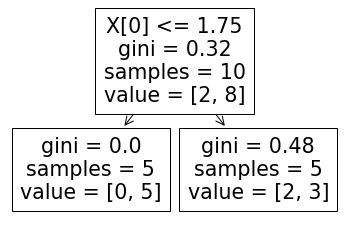

In [21]:
from sklearn import tree
tree.plot_tree(clf.fit(X, y) )